In [914]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None # to turn off the chained assignments

_________________________________
Import inventories dataframe

In [915]:
df_inventories = pd.concat(
    map(pd.read_csv, ['data/lego_sets_2012.csv', 'data/lego_sets_2013.csv', 'data/lego_sets_2014.csv', 'data/lego_sets_2015.csv', 'data/lego_sets_2016.csv', 'data/lego_sets_2017.csv', 'data/lego_sets_2018.csv', 'data/lego_sets_2019.csv', 'data/lego_sets_2020.csv', 'data/lego_sets_2021.csv', 'data/lego_sets_2022.csv']), ignore_index= True)

In [916]:
df_inventories.describe()

,Year,Minifigs,Pieces,RRP (GBP),RRP (USD),RRP (CAD),RRP (EUR),EAN,UPC,Width,...,Flag 1 not used,Flag 2 not used,Flag 3 not used,Flag 4 not used,Flag 5 not used,Flag 6 not used,Flag 7 not used,Flag 8 not used,Value new (USD),Value used (USD)
count,8960.000000,4380.000000,6623.000000,5518.000000,5978.000000,4959.000000,4311.000000,4.591000e+03,4.048000e+03,4999.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6223.000000,4863.000000
mean,2017.201897,2.711187,293.742111,31.808079,35.732753,50.414866,40.653957,5.570997e+12,6.733013e+11,26.001103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.807138,35.659745
std,3.110600,2.777822,589.358683,47.871629,55.157096,70.917301,59.315827,8.015292e+11,1.716260e+10,13.951904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.057426,65.366815
min,2012.000000,1.000000,0.000000,0.000000,0.000000,2.490000,0.010000,6.734191e+11,1.826580e+11,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050000,0.250000
25%,2015.000000,1.000000,29.000000,7.990000,8.230000,13.990000,9.990000,5.702015e+12,6.734192e+11,14.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.495000,5.360000
50%,2017.000000,2.000000,96.000000,17.990000,19.990000,24.990000,19.990000,5.702016e+12,6.734193e+11,25.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.640000,14.150000
75%,2020.000000,3.000000,316.500000,34.990000,39.990000,54.990000,49.990000,5.702017e+12,6.734193e+11,35.407600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.110000,37.230000
max,2022.000000,32.000000,11695.000000,734.990000,849.990000,1049.990000,849.990000,9.788325e+12,8.839294e+11,116.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000,1329.050000


Import scraped Ebay data dataframe

In [917]:
df_ebay = pd.read_csv('lego_ebay_sold_price.csv')

In [918]:
df_ebay.describe()

,title,currency,sold_price,sold_date
count,25691,25536,25536,25802
unique,14749,2,4442,13
top,title,£,sold_price,11 Sep 2022
freq,422,25114,422,3752


___________________________________________________________________
# EDA

CLEAN LEGO INVENTORIES DATA

Remove unused columns and copy to new DataFrame

In [919]:
df_inventories_cleaned = df_inventories[['Number', 'Theme', 'Pieces', 'RRP (GBP)', 'Launch date', 'Exit date']]

In [920]:
df_inventories_cleaned.isnull().sum()

Number            0
Theme             0
Pieces         2337
RRP (GBP)      3442
Launch date    4326
Exit date      4326
dtype: int64

Any missing RRP will be not useful in this analysis. 

So we drop them

In [921]:
df_inventories_cleaned = df_inventories_cleaned[~df_inventories_cleaned['RRP (GBP)'].isna()]

We clean the set number to contain only the main code

In [922]:
df_inventories_cleaned['Number'] = df_inventories_cleaned['Number'].str.replace(r'-\d+', '', regex=True).str.replace(r'\D','', regex=True)
df_inventories_cleaned = df_inventories_cleaned[~(df_inventories_cleaned['Number'] == '')]
df_inventories_cleaned['Number'] = df_inventories_cleaned['Number'].astype('int64')

In [923]:
df_inventories_cleaned[['Launch date', 'Exit date']] = df_inventories_cleaned[['Launch date', 'Exit date']].apply(pd.to_datetime,  format='%d/%m/%Y')

In [924]:
df_inventories_cleaned

,Number,Theme,Pieces,RRP (GBP),Launch date,Exit date
0,3061,Friends,222.0,29.99,2012-01-01,2013-12-31
1,3063,Friends,195.0,19.99,2012-06-01,2013-12-31
2,3065,Friends,191.0,19.99,2012-01-01,2013-12-31
3,3183,Friends,130.0,14.99,2012-01-01,2013-07-31
4,3184,Friends,309.0,29.99,2012-06-01,2013-12-31
...,...,...,...,...,...,...
8904,5007454,Gear,NaN,24.99,NaT,NaT
8905,5007455,Gear,NaN,24.99,NaT,NaT
8909,5007486,Gear,NaN,39.99,NaT,NaT
8911,5007493,Gear,NaN,24.99,NaT,NaT


********************************************
CLEAN SCRAPED EBAY DATA

Extract all numbers found in title into columns

In [925]:

# Extract all numbers in title to a list in a new DataFrame: normally LEGO's numbers code, number of pieces, set quantity, number of minifigures, etc.
df_numbers = df_ebay['title'].str.findall('([0-9]+)').to_list()

# Express all values in list to multi columns, each with one value.
# As with LEGO sets, the number of pieces is usually smaller than the actual number code. Other number are significantly smaller than the pieces and number code.
# Fill all nan value with 0, convert to int data type to find the max value

# df_numbers = df_ebay.numbers.apply(pd.Series).fillna(0).astype(int).max(axis=1)
df_numbers = pd.DataFrame([pd.Series(x, dtype = 'float') for x in df_numbers]).fillna(0).astype(int).max(axis=1) # Use this method to avoid the warning: 'The default dtype for empty Series will be 'object' instead of 'float64' in a future version warning'

In [926]:
df_ebay_cleaned = df_ebay[['title','sold_price', 'sold_date']]
# df_ebay_cleaned['sold_date'] = df_ebay_cleaned['sold_date'].to_datetime

In [927]:
# Update the column 'numbers' with the correct value
df_ebay_cleaned.loc[:,'Number'] = df_numbers
# Check null values in the set
df_ebay_cleaned.isnull().sum()

title         111
sold_price    266
sold_date       0
Number          0
dtype: int64

In [928]:
# Remove duplicates
df_ebay_cleaned = df_ebay_cleaned.drop_duplicates()

Remove Outlier

Are those any invalid values: set number smaller than 999 and larger than 99999

In [929]:
filter = ((df_ebay_cleaned['Number'] < 999) | (df_ebay_cleaned['Number'] > 99999))
filter.sum()

2753

There are invalid values. We're going to drop them.

In [930]:
# Take only row with a valid numbers: number set is from 999 to 99999. 
df_ebay_cleaned = df_ebay_cleaned[~filter]
# Also we droped any row with sold_price is null
df_ebay_cleaned = df_ebay_cleaned[df_ebay_cleaned['sold_price'].notnull()]
df_ebay_cleaned['sold_price'] =df_ebay_cleaned['sold_price'].astype(float)

In [931]:
df_ebay_cleaned['sold_date'] = df_ebay_cleaned['sold_date'].apply(pd.to_datetime,  infer_datetime_format=True)

In [932]:
df_ebay_cleaned

,title,sold_price,sold_date,Number
0,Lego STAR WARS MILLENNIUM FALCON BRAND NEW 135...,108.79,2022-09-09,75257
1,LEGO 40499 Santa's Sleigh (343 pcs) Brand New!...,67.73,2022-09-09,40499
2,LEGO 76208 Marvel Thor Love & Thunder. The Goa...,37.49,2022-09-09,76208
3,LEGO City 60161 - Jungle Exploration Site - BR...,145.00,2022-09-09,60161
4,Lego 75299 Trouble on Tatooine new factory sea...,22.00,2022-09-09,75299
...,...,...,...,...
25797,LEGO Super Mario Starter Course 71360 Expansio...,83.16,2022-09-13,71388
25798,LEGO 30589 - CITY GO-KART RACER POLYBAG,7.79,2022-09-13,30589
25799,Lego Knights Kingdom 8794 Sir Santis Neu,20.11,2022-09-13,8794
25800,NEW Lego 7051 - Space Tripod Invader Alien Con...,51.98,2022-09-13,7051


# Merge two dataset

In [933]:
df = pd.merge(df_ebay_cleaned, df_inventories_cleaned, how='inner', on =['Number'])

In [934]:
df

,title,sold_price,sold_date,Number,Theme,Pieces,RRP (GBP),Launch date,Exit date
0,Lego STAR WARS MILLENNIUM FALCON BRAND NEW 135...,108.79,2022-09-09,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
1,LEGO Millennium Falcon Star Wars TM (75257) *F...,117.50,2022-09-09,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
2,LEGO Millennium Falcon Star Wars TM (75257) 13...,119.23,2022-09-07,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
3,"LEGO Star Wars: Millennium Falcon (75257), new...",109.00,2022-09-10,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
4,LEGO Millennium Falcon Star Wars TM (75257) 13...,118.27,2022-09-09,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
...,...,...,...,...,...,...,...,...,...
14516,"Lego City Sea Rescue Plane, 60164, New 2017 Co...",21.99,2022-09-13,60164,City,141.0,15.99,2017-06-01,2018-12-31
14517,LEGO TECHNIC: Hovercraft+Aeroplane (42002) BRA...,14.99,2022-09-13,42002,Technic,170.0,12.99,NaT,NaT
14518,LEGO Technic Powered Up Large Motor Electric 8...,18.98,2022-09-13,88013,Powered Up,1.0,29.99,NaT,NaT
14519,SET BOITE LEGO CITY NEUF 60149 LE BATEAU CATAM...,21.85,2022-09-13,60149,City,198.0,17.99,NaT,NaT


***************************************************************************************************************************************************************


# Exploratory Data Analysis

## Total sold themes wise

In [935]:
len(df['Theme'].unique())

78

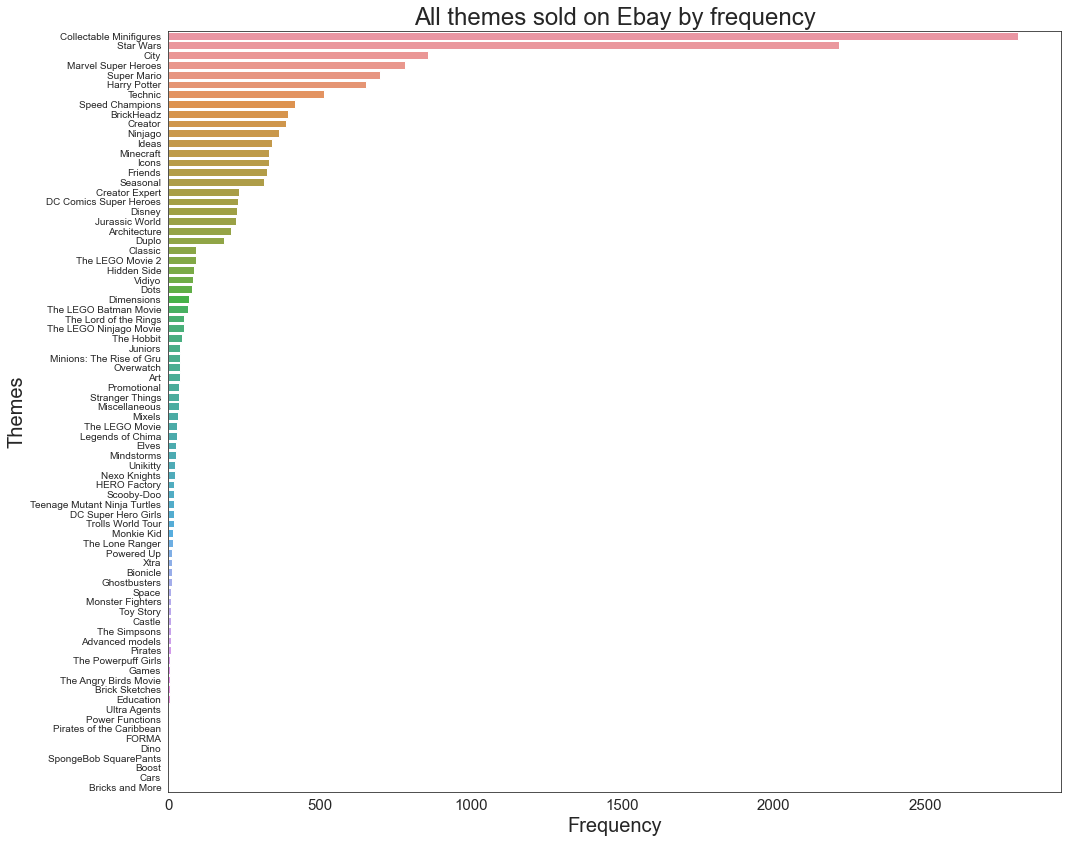

In [936]:
fig, ax = plt.subplots(figsize = (16,14))
themes_count = df['Theme'].value_counts()
ax = sns.barplot(x = themes_count, y = themes_count.index, data=df)
plt.xticks(size=15)
plt.xlabel('Frequency', size = 20)
plt.ylabel('Themes', size = 20)
plt.title('All themes sold on Ebay by frequency', size = 24)
plt.show()


There are a number of themes have verry little sold. So these are considered as outlier and we will remove them in the analysis.

In [937]:
ix = df['Theme'].value_counts()[df['Theme'].value_counts()<100].index
index = df[df['Theme'].isin(ix)].index
df.drop(index, axis=0, inplace=True)

In [938]:
df

,title,sold_price,sold_date,Number,Theme,Pieces,RRP (GBP),Launch date,Exit date
0,Lego STAR WARS MILLENNIUM FALCON BRAND NEW 135...,108.79,2022-09-09,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
1,LEGO Millennium Falcon Star Wars TM (75257) *F...,117.50,2022-09-09,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
2,LEGO Millennium Falcon Star Wars TM (75257) 13...,119.23,2022-09-07,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
3,"LEGO Star Wars: Millennium Falcon (75257), new...",109.00,2022-09-10,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
4,LEGO Millennium Falcon Star Wars TM (75257) 13...,118.27,2022-09-09,75257,Star Wars,1351.0,149.99,2019-10-04,2023-12-31
...,...,...,...,...,...,...,...,...,...
14514,LEGO 41329 Friends Olivia’s Deluxe Bedroom Pla...,12.99,2022-09-13,41329,Friends,163.0,12.99,2018-01-01,2018-12-31
14516,"Lego City Sea Rescue Plane, 60164, New 2017 Co...",21.99,2022-09-13,60164,City,141.0,15.99,2017-06-01,2018-12-31
14517,LEGO TECHNIC: Hovercraft+Aeroplane (42002) BRA...,14.99,2022-09-13,42002,Technic,170.0,12.99,NaT,NaT
14519,SET BOITE LEGO CITY NEUF 60149 LE BATEAU CATAM...,21.85,2022-09-13,60149,City,198.0,17.99,NaT,NaT


## Price range of themes

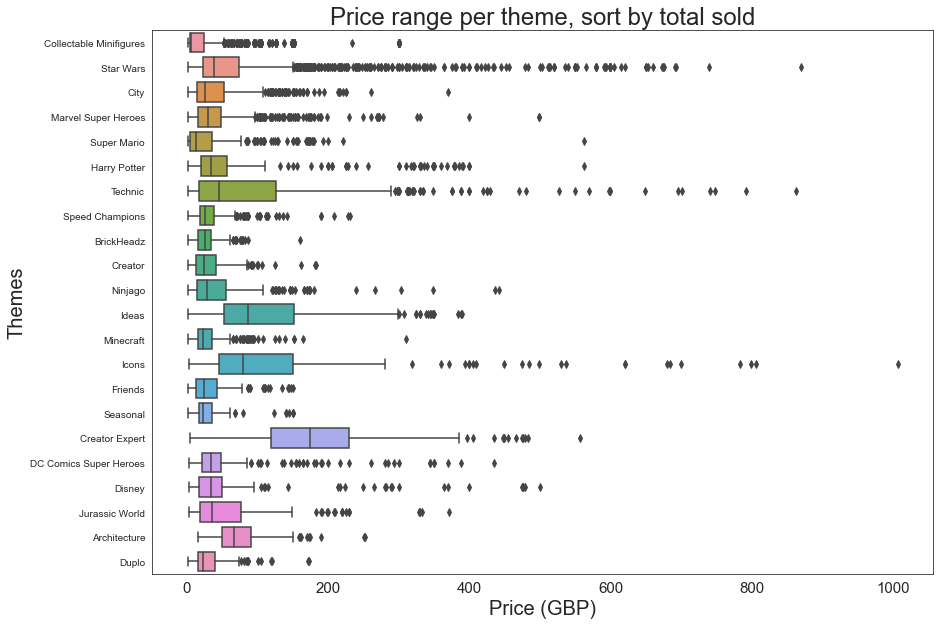

In [939]:
fig, ax = plt.subplots(figsize = (14,10))
order = df['Theme'].value_counts().index
ax = sns.boxplot(data=df, x='sold_price', y='Theme', order=order)
plt.xticks(size=15)
plt.xlabel('Price (GBP)', size = 20)
plt.ylabel('Themes', size = 20)
plt.title('Price range per theme, sort by total sold', size = 24)
plt.show()

We can notice many outliers in each set. The reason might be some sellers sold multiple sets per ad. But to keep the simplicity of this analysis, we don't address this problem. Instead, we treat these as outliers needed to be removed.

### Remove outliers using IQR

In [940]:
# IQR : Inter Quarltile Range
Q1 = df['sold_price'].quantile(0.25)
Q3 = df['sold_price'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['sold_price'] < (Q1 - 1.5 * IQR)) |(df['sold_price'] > (Q3 + 1.5 * IQR)))]

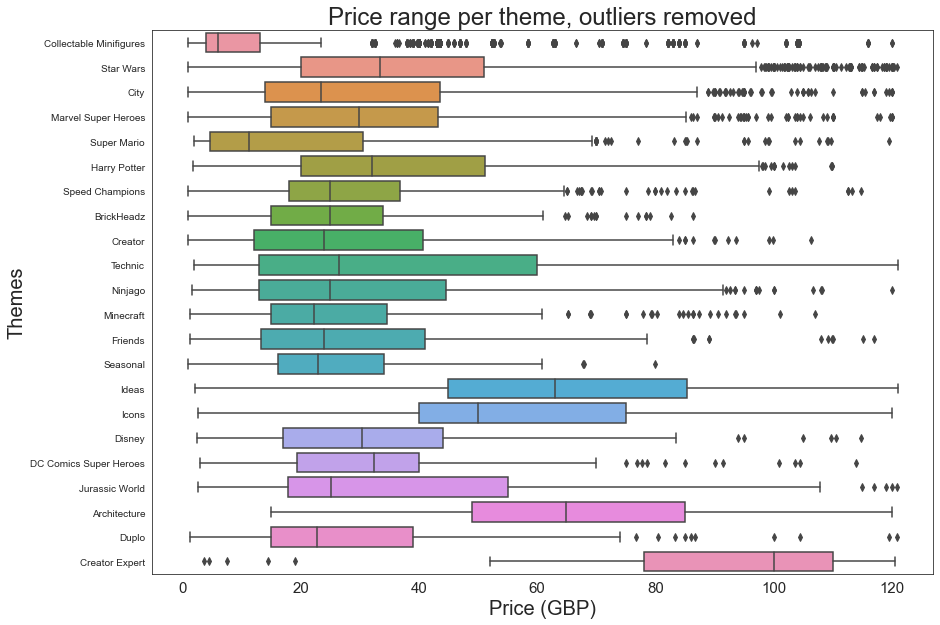

In [941]:
fig, ax = plt.subplots(figsize = (14,10))
order = df['Theme'].value_counts().index
ax = sns.boxplot(data=df, x='sold_price', y='Theme', order=order)
plt.xticks(size=15)
plt.ylabel('Themes', size = 20)
plt.xlabel('Price (GBP)', size = 20)

# ax2 = ax.twinx()
# df_mean = df.groupby(['Theme']).mean().loc[order]
# x = df_mean['RRP (GBP)']
# y = df_mean.index
# plt.plot(x, y)
# ax2 = sns.pointplot(data=df, x='RRP (GBP)', y='Theme', order=order, color='red') # Mean retail price

plt.title('Price range per theme, outliers removed', size = 24)
plt.show()

The results look better. However in some themes such 'Collectable Minifigures' the data is very skwed and the outliers is far away from the mean. So we explore the RRP and mean sale

Results look much better.
Clearly we can see each themes has its own price range.

## Total solds set size wise

### Cartogrise set size
* Small < 500 pcs
* Medium = 500-1000 pcs
* Large > 1000 pcs


In [942]:
df['Pieces'] = df['Pieces'].fillna(0).astype('int64')
df.loc[df['Pieces'] <= 500, 'Size'] = 'Small Set'
df.loc[(df['Pieces'] > 500) & (df['Pieces'] <= 1000) ,'Size'] = 'Medium Set'
df.loc[df['Pieces'] > 1000, 'Size'] = 'Large Set'

In [943]:
dfg = df.groupby(['Theme','Size']).agg(Frequency=('Size', 'size')).reset_index()

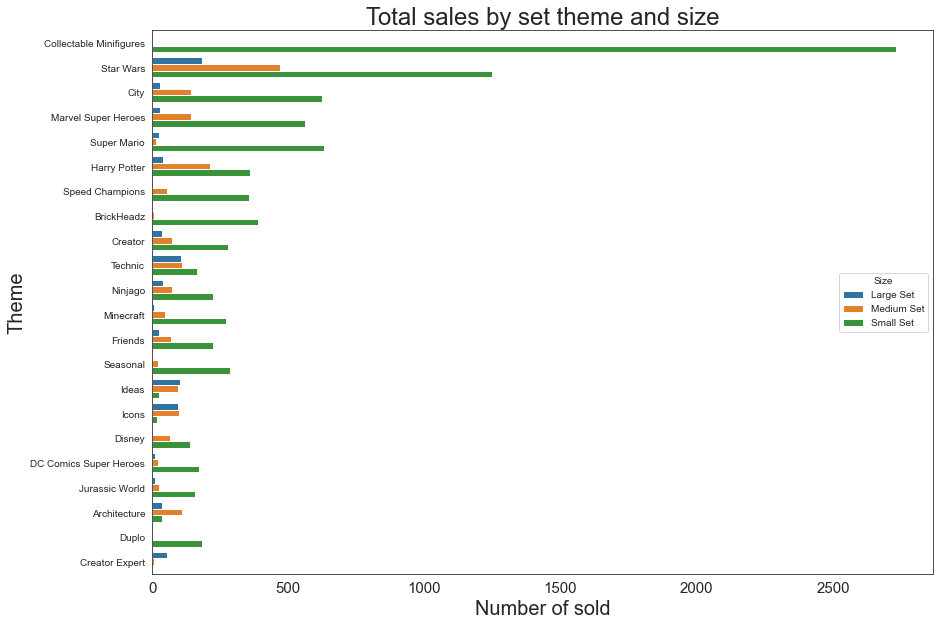

In [944]:
fig, ax = plt.subplots(figsize=(14,10))
colors = sns.color_palette('pastel')
# dfg= df.groupby(['Theme','Size']).size()
ax = sns.barplot(data=dfg, y='Theme', x='Frequency', hue='Size', order=order)
# ax = df.groupby(['Theme','Size']).size().unstack().plot(kind='barh', figsize=(14,10), stacked=True)

plt.xlabel('Number of sold', size = 20)
plt.xticks(size=15)
plt.ylabel('Theme', size = 20)
plt.title('Total sales by set theme and size', size = 24)

plt.show()

Most of the sets sold on Ebay are small sets. This might be due to small sets are cheaper compared to medium and large sets.

## Price Range by set size

In [945]:
df

,title,sold_price,sold_date,Number,Theme,Pieces,RRP (GBP),Launch date,Exit date,Size
0,Lego STAR WARS MILLENNIUM FALCON BRAND NEW 135...,108.79,2022-09-09,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set
1,LEGO Millennium Falcon Star Wars TM (75257) *F...,117.50,2022-09-09,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set
2,LEGO Millennium Falcon Star Wars TM (75257) 13...,119.23,2022-09-07,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set
3,"LEGO Star Wars: Millennium Falcon (75257), new...",109.00,2022-09-10,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set
4,LEGO Millennium Falcon Star Wars TM (75257) 13...,118.27,2022-09-09,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set
...,...,...,...,...,...,...,...,...,...,...
14514,LEGO 41329 Friends Olivia’s Deluxe Bedroom Pla...,12.99,2022-09-13,41329,Friends,163,12.99,2018-01-01,2018-12-31,Small Set
14516,"Lego City Sea Rescue Plane, 60164, New 2017 Co...",21.99,2022-09-13,60164,City,141,15.99,2017-06-01,2018-12-31,Small Set
14517,LEGO TECHNIC: Hovercraft+Aeroplane (42002) BRA...,14.99,2022-09-13,42002,Technic,170,12.99,NaT,NaT,Small Set
14519,SET BOITE LEGO CITY NEUF 60149 LE BATEAU CATAM...,21.85,2022-09-13,60149,City,198,17.99,NaT,NaT,Small Set


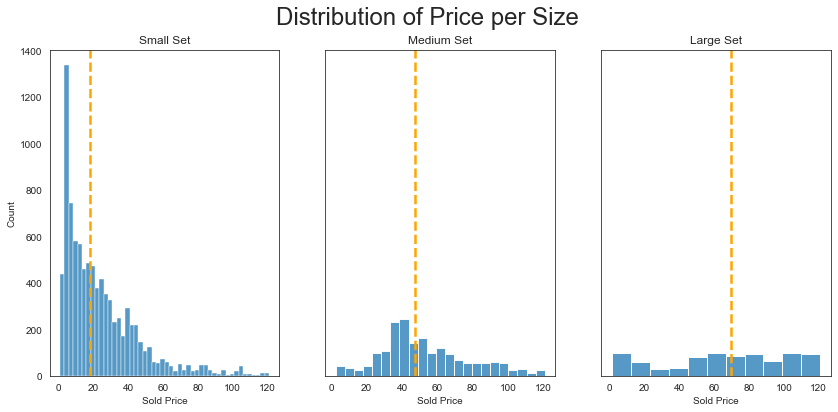

In [946]:

fig, axes = plt.subplots(1, 3, figsize = (14,6), sharey=True)
# ax = sns.boxplot(data=df,  x='Size', y='sold_price', order = ['Small Set', 'Medium Set', 'Large Set'], width=0.5)

# iterate through each axes
for ax in axes:
    
    # select the data for the sizes
    if ax == axes[0]:
        data = df[df['Size'] == 'Small Set']['sold_price']
    if ax == axes[1]:
        data = df[df['Size'] == 'Medium Set']['sold_price']
    if ax == axes[2]:
        data = df[df['Size'] == 'Large Set']['sold_price']
    
    # plot the lines
    # ax.axvline(x=data.mean(), c='k', ls='-', lw=2.5)
    ax.axvline(x=data.median(), c='orange', ls='--', lw=2.5)


sns.histplot(data=df, x=df[df['Size'] == 'Small Set']['sold_price'], ax=axes[0])
axes[0].set(title='Small Set', xlabel='Sold Price')
sns.histplot(data=df, x=df[df['Size'] == 'Medium Set']['sold_price'], ax=axes[1])
axes[1].set(title='Medium Set', xlabel='Sold Price')
sns.histplot(data=df, x=df[df['Size'] == 'Large Set']['sold_price'], ax=axes[2])
axes[2].set(title='Large Set', xlabel='Sold Price')
fig.suptitle('Distribution of Price per Size', size = 24)
plt.show()
# plt.xticks(size=15)
# plt.xlabel('Size', size = 18)
# plt.ylabel('Sold Price (GBP)', size = 18)


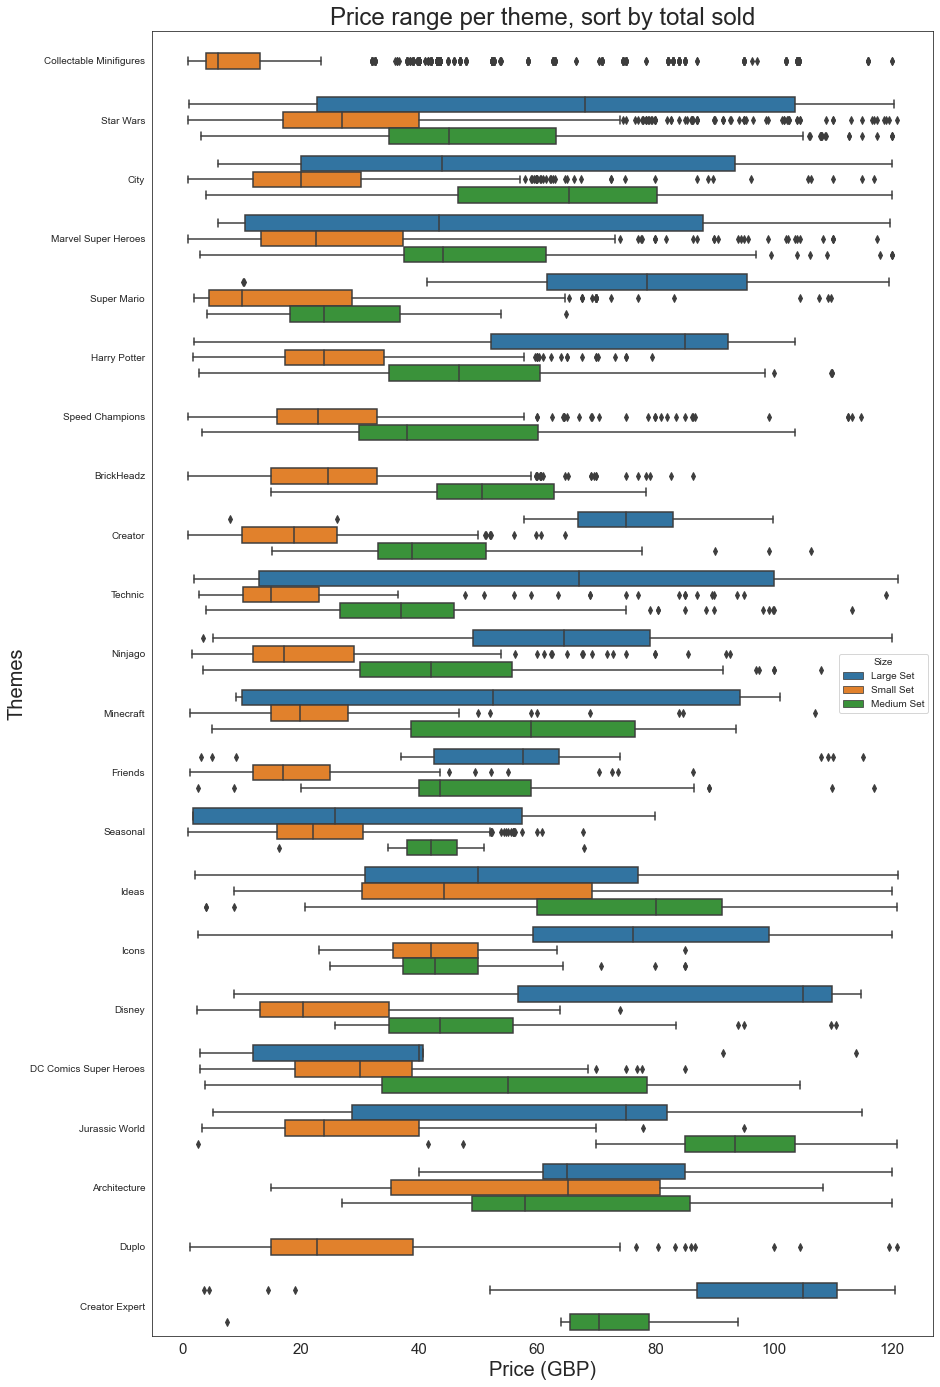

In [947]:
fig, ax = plt.subplots(figsize = (14,24))
# order = df['Theme'].value_counts().index
ax = sns.boxplot(data=df, x='sold_price', y='Theme', hue='Size', order=order)
plt.xticks(size=15)
plt.xlabel('Price (GBP)', size = 20)
plt.ylabel('Themes', size = 20)
plt.title('Price range per theme, sort by total sold', size = 24)
plt.show()

## Analyse by Years

In [948]:
df['age'] = round((df['sold_date'] - df['Launch date'])/np.timedelta64(1, 'Y'),0)
df['to_retire'] = round((df['Exit date'] - df['sold_date'])/np.timedelta64(1, 'Y'),0)
df['available'] = round((df['Exit date'] - df['Launch date'])/np.timedelta64(1, 'Y'),0)

In [949]:
df

,title,sold_price,sold_date,Number,Theme,Pieces,RRP (GBP),Launch date,Exit date,Size,age,to_retire,available
0,Lego STAR WARS MILLENNIUM FALCON BRAND NEW 135...,108.79,2022-09-09,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,3.0,1.0,4.0
1,LEGO Millennium Falcon Star Wars TM (75257) *F...,117.50,2022-09-09,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,3.0,1.0,4.0
2,LEGO Millennium Falcon Star Wars TM (75257) 13...,119.23,2022-09-07,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,3.0,1.0,4.0
3,"LEGO Star Wars: Millennium Falcon (75257), new...",109.00,2022-09-10,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,3.0,1.0,4.0
4,LEGO Millennium Falcon Star Wars TM (75257) 13...,118.27,2022-09-09,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14514,LEGO 41329 Friends Olivia’s Deluxe Bedroom Pla...,12.99,2022-09-13,41329,Friends,163,12.99,2018-01-01,2018-12-31,Small Set,5.0,-4.0,1.0
14516,"Lego City Sea Rescue Plane, 60164, New 2017 Co...",21.99,2022-09-13,60164,City,141,15.99,2017-06-01,2018-12-31,Small Set,5.0,-4.0,2.0
14517,LEGO TECHNIC: Hovercraft+Aeroplane (42002) BRA...,14.99,2022-09-13,42002,Technic,170,12.99,NaT,NaT,Small Set,NaN,NaN,NaN
14519,SET BOITE LEGO CITY NEUF 60149 LE BATEAU CATAM...,21.85,2022-09-13,60149,City,198,17.99,NaT,NaT,Small Set,NaN,NaN,NaN


In [950]:
fig, ax = plt.subplots(figsize = (14,24))
# order = df['Theme'].value_counts().index
ax = sns.boxplot(data=df, x='sold_price', y='age')

## The median difference betwene the sale price and the retail price

In [ ]:
df['profit'] = df['sold_price'] - df['RRP (GBP)']
df.head()

,title,sold_price,sold_date,Number,Theme,Pieces,RRP (GBP),Launch date,Exit date,Size,age,to_retire,available,profit
0,Lego STAR WARS MILLENNIUM FALCON BRAND NEW 135...,108.79,2022-09-09,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,2.9,1.3,4.2,-41.20
1,LEGO Millennium Falcon Star Wars TM (75257) *F...,117.50,2022-09-09,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,2.9,1.3,4.2,-32.49
2,LEGO Millennium Falcon Star Wars TM (75257) 13...,119.23,2022-09-07,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,2.9,1.3,4.2,-30.76
3,"LEGO Star Wars: Millennium Falcon (75257), new...",109.00,2022-09-10,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,2.9,1.3,4.2,-40.99
4,LEGO Millennium Falcon Star Wars TM (75257) 13...,118.27,2022-09-09,75257,Star Wars,1351,149.99,2019-10-04,2023-12-31,Large Set,2.9,1.3,4.2,-31.72


In [ ]:
df.groupby(['Theme','Size'])['profit'].median()

Theme                    Size      
Architecture             Large Set     -25.140
                         Medium Set     20.010
                         Small Set      39.890
BrickHeadz               Medium Set     10.670
                         Small Set       9.255
City                     Large Set    -115.000
                         Medium Set    -20.700
                         Small Set       1.010
Collectable Minifigures  Small Set       3.000
Creator                  Large Set     -22.350
                         Medium Set     -4.590
                         Small Set       3.845
Creator Expert           Large Set       2.610
                         Medium Set     -1.990
DC Comics Super Heroes   Large Set    -118.000
                         Medium Set     -9.990
                         Small Set       1.160
Disney                   Large Set     -54.990
                         Medium Set     -2.540
                         Small Set      -4.940
Duplo                   

In [ ]:
df['profit_40_off'] = df['sold_price'] - df['RRP (GBP)']*0.6

In [ ]:
df.groupby('Size')['profit_40_off'].median()

Size
Large Set      7.371
Medium Set    11.001
Small Set      7.496
Name: profit_40_off, dtype: float64

Top 20 sets sold on Ebay by frequency

In [ ]:
top_sets = df['Number'].value_counts().to_frame().reset_index().head(20)
top_sets.columns = ['Number', 'frequency']
top_sets

,Number,frequency
0,71033,637
1,71017,336
2,71032,247
3,71024,228
4,71009,198
5,71010,170
6,71034,166
7,71402,154
8,71386,132
9,71029,126


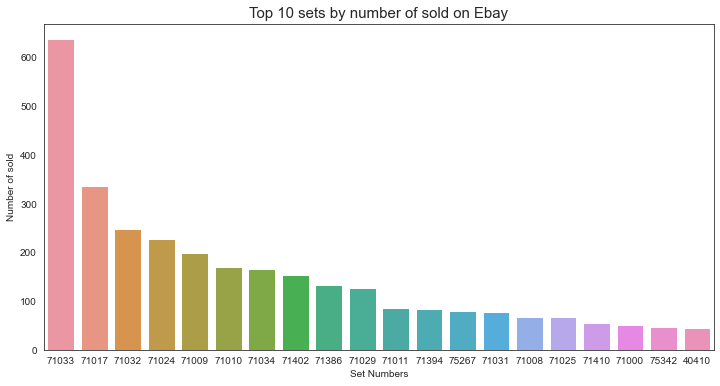

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
order_list = top_sets.Number.to_list()
ax = sns.barplot(x = 'Number', y = 'frequency', data = top_sets, order=order_list)
plt.title('Top 10 sets by number of sold on Ebay', size = 15)
plt.xlabel('Set Numbers')
plt.ylabel('Number of sold')
plt.show()

Take a deeper look at the top 5 sets specifically.

In [ ]:
# top_sets2 = df_ebay_cleaned[df_ebay_cleaned['numbers'].isin(top_sets['set_numbers'])]
# cols = {'sold_price':'mean', 'sold_price':'std'}
# df_deep = df_ebay_cleaned[df_ebay_cleaned['numbers'].isin(top_sets['set_numbers'])].groupby('numbers', as_index=True).agg({'sold_price': ['mean','std', 'count']})
df_deep = df[df['Number'].isin(top_sets['Number'].head(5))]
df_deep['sold_price'] = df_deep['sold_price'].astype(float)
df_deep


,title,sold_price,sold_date,Number,Theme,Pieces,RRP (GBP),Launch date,Exit date,Size,age,to_retire,available,profit,profit_40_off
921,New listingLEGO MINIFIGURES The Muppets (71033...,9.99,2022-09-09,71033,Collectable Minifigures,0,3.49,NaT,NaT,Small Set,NaN,NaN,NaN,6.50,7.896
922,New listingLEGO MINIFIGURES The Muppets (71033...,9.99,2022-09-09,71033,Collectable Minifigures,7,3.49,NaT,NaT,Small Set,NaN,NaN,NaN,6.50,7.896
923,New listingLEGO MINIFIGURES The Muppets (71033...,9.99,2022-09-09,71033,Collectable Minifigures,4,3.49,NaT,NaT,Small Set,NaN,NaN,NaN,6.50,7.896
924,New listingLEGO MINIFIGURES The Muppets (71033...,9.99,2022-09-09,71033,Collectable Minifigures,5,3.49,NaT,NaT,Small Set,NaN,NaN,NaN,6.50,7.896
925,New listingLEGO MINIFIGURES The Muppets (71033...,9.99,2022-09-09,71033,Collectable Minifigures,4,3.49,NaT,NaT,Small Set,NaN,NaN,NaN,6.50,7.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13376,LEGO Simpsons Mini Figure Series 2 Professor F...,3.25,2022-09-13,71009,Collectable Minifigures,6,2.49,2015-05-01,2015-08-31,Small Set,7.4,-7.0,0.3,0.76,1.756
13377,LEGO Simpsons Mini Figure Series 2 Professor F...,3.25,2022-09-13,71009,Collectable Minifigures,5,2.49,2015-05-01,2015-08-31,Small Set,7.4,-7.0,0.3,0.76,1.756
13378,LEGO Simpsons Mini Figure Series 2 Professor F...,3.25,2022-09-13,71009,Collectable Minifigures,4,2.49,2015-05-01,2015-08-31,Small Set,7.4,-7.0,0.3,0.76,1.756
13379,LEGO Simpsons Mini Figure Series 2 Professor F...,3.25,2022-09-13,71009,Collectable Minifigures,78,2.49,2015-05-01,2015-08-31,Small Set,7.4,-7.0,0.3,0.76,1.756


Check Theme


Text(0.5, 0, 'Set Number')

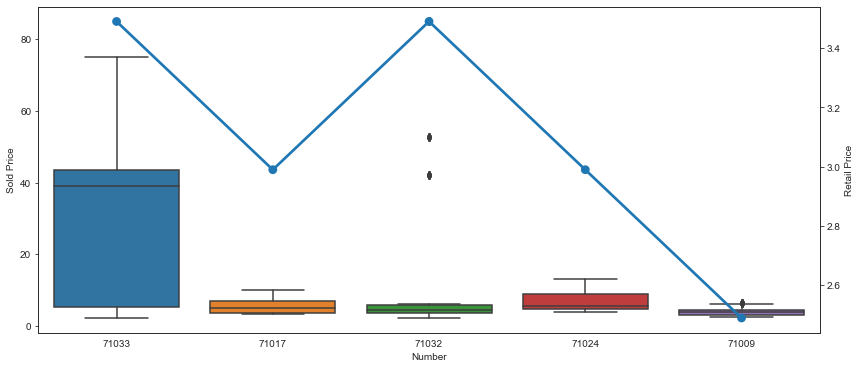

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.set_style("white")
ax = sns.boxplot(data=df_deep, x='Number', y='sold_price', order=order_list[:5])
plt.ylabel('Sold Price')
ax2 = ax.twinx()
ax2 = sns.pointplot(data=df_deep, x='Number', y='RRP (GBP)', order=order_list[:5])
plt.ylabel('Retail Price')
plt.xlabel('Set Number')


As we can see, the prices for each set have some outliers. So a cleaning up needed to be done. 

Applying the interquartile filter to remove outliers:

Text(0, 0.5, 'Retail Price')

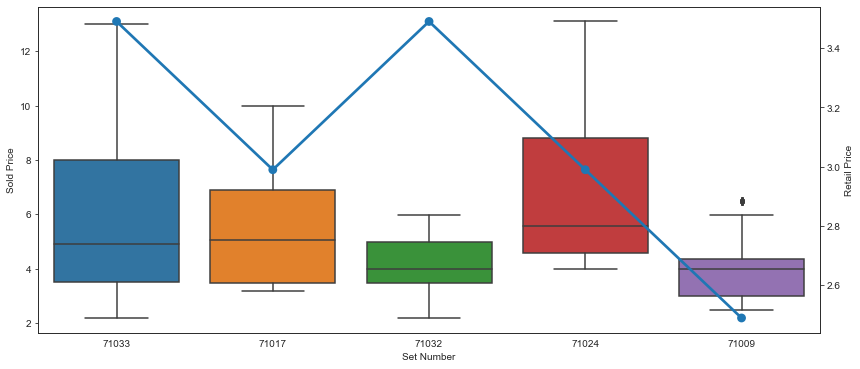

In [ ]:
# IQR : Inter Quarltile Range
Q1 = df_deep['sold_price'].quantile(0.25)
Q3 = df_deep['sold_price'].quantile(0.75)
IQR = Q3 - Q1

df_deep = df_deep[~((df_deep['sold_price'] < (Q1 - 1.5 * IQR)) |(df_deep['sold_price'] > (Q3 + 1.5 * IQR)))]
fig, ax = plt.subplots(figsize = (14,6))
sns.set_style("white")
ax = sns.boxplot(data=df_deep, x='Number', y='sold_price', order=order_list[:5])
plt.xlabel('Set Number')
plt.ylabel('Sold Price')
ax2 = ax.twinx()
ax2 = sns.pointplot(data=df_deep, x='Number', y='RRP (GBP)', order=order_list[:5])
plt.ylabel('Retail Price')

The resulting is much cleaner. However, we noticed set 71033, 71034, 71410 has very broad price range while its data is very skewed

* sns.histplot for price per top sale sets
* Todo: sold_price vs minifigures, years: sns.barplot (stripplot) t
* Todo: correlation between all metrics
* Todo: average price per piece for different theme
* Todo: plot price vs theme using seaborn.regplot
* Todo: looking at correlation: df.corr(method = 'pearson'): sold_price, theme, pieces, minifigures, years, size. Plot sns.heatmap

# By Theme
# By Size
# By Years
# Search resale house price, resale sneakers
https://www.youtube.com/watch?v=V6V2qzJ4JFs
https://sameen73.github.io/stock_x_analysis.html